In [1]:
%matplotlib inline

In [2]:
# Import the dependencies.
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import api_key
from config import g_key
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Create a set of random latitude and longitude combinations.
# keep size at 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#print(lat_lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-87.46259546721734, 127.99335148466122),
 (-64.13881048338287, 62.89590691871075),
 (-4.826210456790122, -148.79118660603575),
 (-78.09818944396396, 15.586950360186052),
 (83.68046745411533, -70.29323862740823),
 (-62.37024172103963, 163.32852597763792),
 (-75.3311243352639, 48.11844215658883),
 (-15.455768693903124, 91.57291716798471),
 (-55.234683995878015, 177.58605760702278),
 (69.67627761187791, -105.65742124589227),
 (49.70984819575352, 126.12812048315334),
 (56.257756300451206, 139.55807030976183),
 (85.193396736652, -145.59942499915448),
 (-41.77235158354865, 67.74014005670608),
 (-76.22638535695428, -176.0502667612095),
 (-85.44083494655266, 159.7757072958334),
 (-32.72081474706478, 63.258038908467),
 (65.46252583400201, 59.131456791915866),
 (56.56235954105887, 92.17945588039214),
 (81.76183638938818, 69.20771923993493),
 (-4.031352487195207, -148.49624489670632),
 (-27.156738907896354, 145.4022681304141),
 (78.91962518363886, -3.960212013343977),
 (68.85627365136773, -64.4

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Create an endpoint URL for a city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city_name in enumerate(cities):
# Build query URL
    city_name = city_name.replace(" ","+")
    query_url = url + "q=" + city_name + "&appid=" + api_key + "&units=" + units
    try:
        response = requests.get(query_url).json()
        country = response["sys"]["country"]
        date = response["dt"]
        date = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        lon = response["coord"]["lon"]
        lat = response["coord"]["lat"]
        max_temp = response["main"]["temp_max"]
        humidity =  response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        
        city_data.append({"City": city_name.title(),
                          "Lat": lat,
                          "Lng": lon,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})
    except:
        print(f"{city_name} weather not found.")
        continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
taolanaro weather not found.
illoqqortoormiut weather not found.
vaitupu weather not found.
labutta weather not found.
mys+shmidta weather not found.
barentsburg weather not found.
tumannyy weather not found.
belushya+guba weather not found.
grand+river+south+east weather not found.
babanusah weather not found.
tsihombe weather not found.
amderma weather not found.
cagayan+de+tawi-tawi weather not found.
marcona weather not found.
utiroa weather not found.
samusu weather not found.
attawapiskat weather not found.
meyungs weather not found.
nizhneyansk weather not found.
halalo weather not found.
solovetskiy weather not found.
la+gaulette weather not found.
saleaula weather not found.
uwayl weather not found.
umzimvubu weather not found.
chagda weather not found.
sentyabrskiy weather not found.
bur+gabo weather not found.
kuala+krai weather not found.
kazalinsk weather not found.
andevoranto weather not found.
burica weather no

In [7]:
city_weather_df = pd.DataFrame(city_data)

In [8]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New+Norfolk,-42.7826,147.0587,44.58,71,36,1.99,AU,2021-05-27 22:45:03
1,Atuona,-9.8000,-139.0333,78.96,73,12,14.23,PF,2021-05-27 22:44:50
2,Bredasdorp,-34.5322,20.0403,63.28,51,96,7.67,ZA,2021-05-27 22:44:41
3,Qaanaaq,77.4840,-69.3632,37.49,75,100,7.02,GL,2021-05-27 22:45:04
4,Bluff,-46.6000,168.3333,49.80,88,100,9.06,NZ,2021-05-27 22:45:04


In [9]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_weather_df = city_weather_df[column_order]
city_weather_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New+Norfolk,AU,2021-05-27 22:45:03,-42.7826,147.0587,44.58,71,36,1.99
1,Atuona,PF,2021-05-27 22:44:50,-9.8000,-139.0333,78.96,73,12,14.23
2,Bredasdorp,ZA,2021-05-27 22:44:41,-34.5322,20.0403,63.28,51,96,7.67
3,Qaanaaq,GL,2021-05-27 22:45:04,77.4840,-69.3632,37.49,75,100,7.02
4,Bluff,NZ,2021-05-27 22:45:04,-46.6000,168.3333,49.80,88,100,9.06


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_weather_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_weather_df["Lat"]
max_temps = city_weather_df["Max Temp"]
humidity = city_weather_df["Humidity"]
cloudiness = city_weather_df["Cloudiness"]
wind_speed = city_weather_df["Wind Speed"]

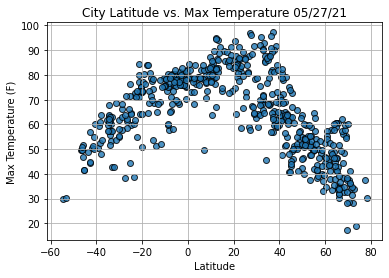

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps, edgecolor = "black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

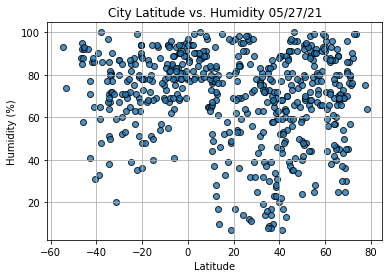

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

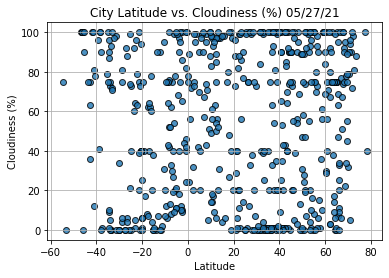

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

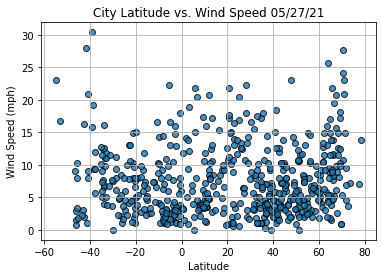

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] >= 0)]
southern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] < 0)]

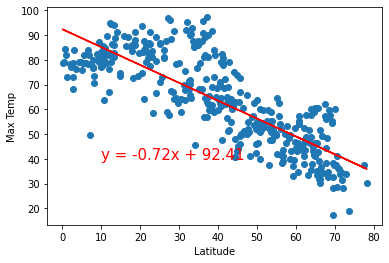

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

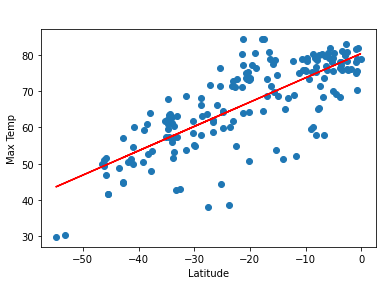

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

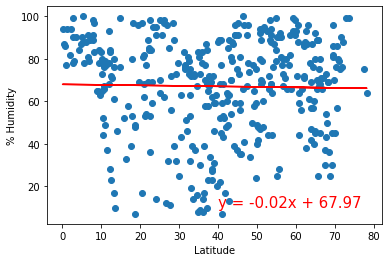

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


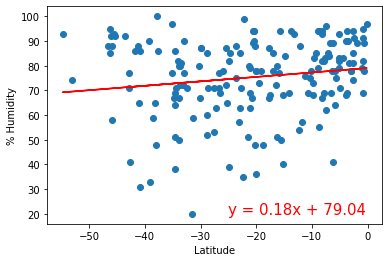

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,20))

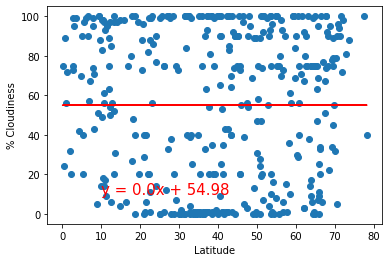

In [22]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,10))


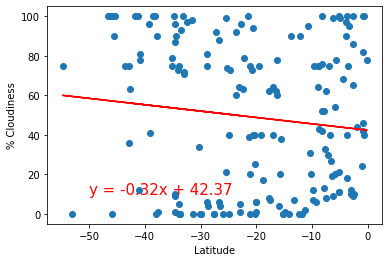

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,10))


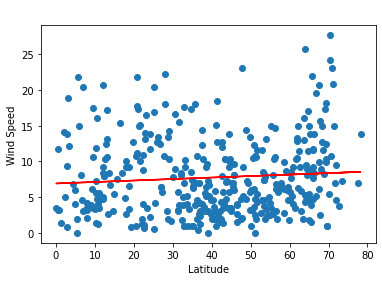

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,30))


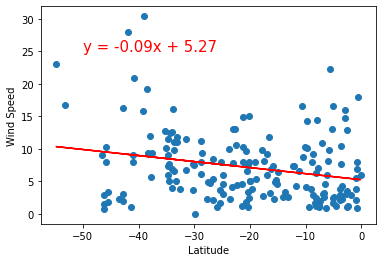

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [26]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [27]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [41]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Heatmap of percent Cloudiness
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Heatmap of percent Wind Speed
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [48]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Atuona,PF,2021-05-27 22:44:50,-9.8000,-139.0333,78.96,73,12,14.23
6,6,Bengkulu,ID,2021-05-27 22:45:05,-3.8004,102.2655,76.21,90,97,3.87
13,13,Vaini,TO,2021-05-27 22:45:07,-21.2000,-175.2000,77.16,69,20,10.36
23,23,Kampong+Cham,KH,2021-05-27 22:45:10,11.9934,105.4635,76.26,93,63,4.97
32,32,Avarua,CK,2021-05-27 22:45:12,-21.2078,-159.7750,84.25,79,75,14.97
37,37,Buluang,PH,2021-05-27 22:45:13,13.3068,123.3425,82.69,80,100,2.71
38,38,Savalou,BJ,2021-05-27 22:45:13,7.9281,1.9756,76.64,91,99,4.21
40,40,Matara,LK,2021-05-27 22:41:04,5.9485,80.5353,78.85,88,99,15.01
43,43,Pacific+Grove,US,2021-05-27 22:45:14,36.6177,-121.9166,82.15,77,1,7.00
44,44,Sinjar,IQ,2021-05-27 22:45:15,36.3209,41.8754,81.25,17,0,4.63


In [67]:
hotel_df = preferred_cities_df[["City", "Country", "Lat", "Lng", "Max Temp"]].copy()

In [113]:
hotel_df["Hotel Name"] = ""
hotel_df.count()

City          170
Country       170
Lat           170
Lng           170
Max Temp      170
Hotel Name    170
dtype: int64

In [116]:
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key}
for index, row in hotel_df.iterrows():
    try:
        Lat = str(row["Lat"])
        Lng = str(row["Lng"])
        params={"location": f"{Lat},{Lng}"}
        base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
        new_url = base_url+"location="+Lat+","+Lng+"&radius=5000&types=lodging&key="+g_key
        #print(new_url)
        hotels = requests.get(new_url).json()
        # Grab the first hotel from the results and store the name.
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except(IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [117]:
hotel_df.head(100)

,City,Country,Lat,Lng,Max Temp,Hotel Name
1,Atuona,PF,-9.8000,-139.0333,78.96,Villa Enata
6,Bengkulu,ID,-3.8004,102.2655,76.21,Grage Hotel Bengkulu
13,Vaini,TO,-21.2000,-175.2000,77.16,Keleti Beach Resort
23,Kampong+Cham,KH,11.9934,105.4635,76.26,7 Makara Hotel
32,Avarua,CK,-21.2078,-159.7750,84.25,Paradise Inn
...,...,...,...,...,...,...
320,Guiratinga,BR,-16.3494,-53.7583,78.84,Hotel Angra do Cerrado - Guiratinga MT
322,Samarai,PG,-10.6167,150.6667,78.80,Nuli Sapi
325,Winnemucca,US,40.9730,-117.7357,82.45,Winners Inn Casino
329,Humaita,BR,-7.5061,-63.0208,79.79,Corrêa Hotel


In [121]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [122]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [123]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))